In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets,tree
from sklearn.tree import export_graphviz
from sklearn import externals
from io import StringIO
import pydotplus
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/Fraud_check.csv")


In [3]:
df1 = df.copy()


In [4]:
df1.head()


,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [5]:
df1.head()


,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [6]:
df1.isnull().sum()


Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [7]:
df1.dtypes


Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

Outlier Check


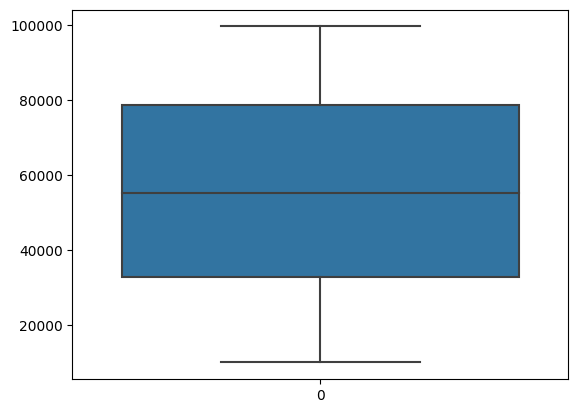

In [8]:
ax = sns.boxplot(df1['Taxable.Income'])

There are no outliers in the data

In [9]:
plt.rcParams["figure.figsize"] = 9,5


Skew: 0.030014788906377175
Kurtosis: -1.1997824607083138


<ipython-input-10-f81e33b9586a>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df1['Taxable.Income'],shade=True,color='g')


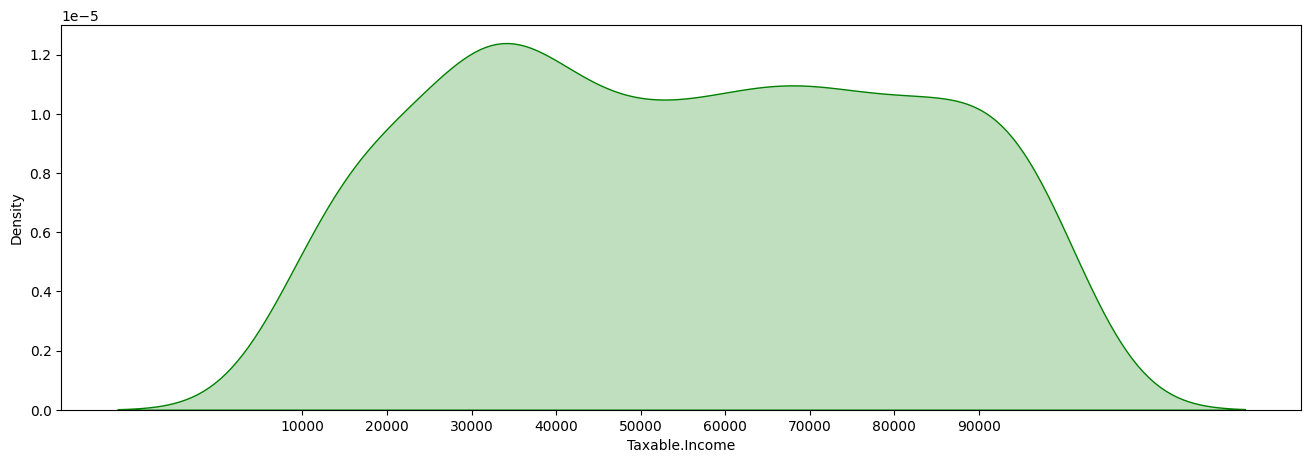

In [10]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df1['Taxable.Income'].skew()))
print("Kurtosis: {}".format(df1['Taxable.Income'].kurtosis()))
ax = sns.kdeplot(df1['Taxable.Income'],shade=True,color='g')
plt.xticks([i for i in range(10000,100000,10000)])
plt.show()

The data is Skwed on the right

The data has negative Kurtosis

In [11]:
obj_colum = df1.select_dtypes(include='object').columns.tolist()


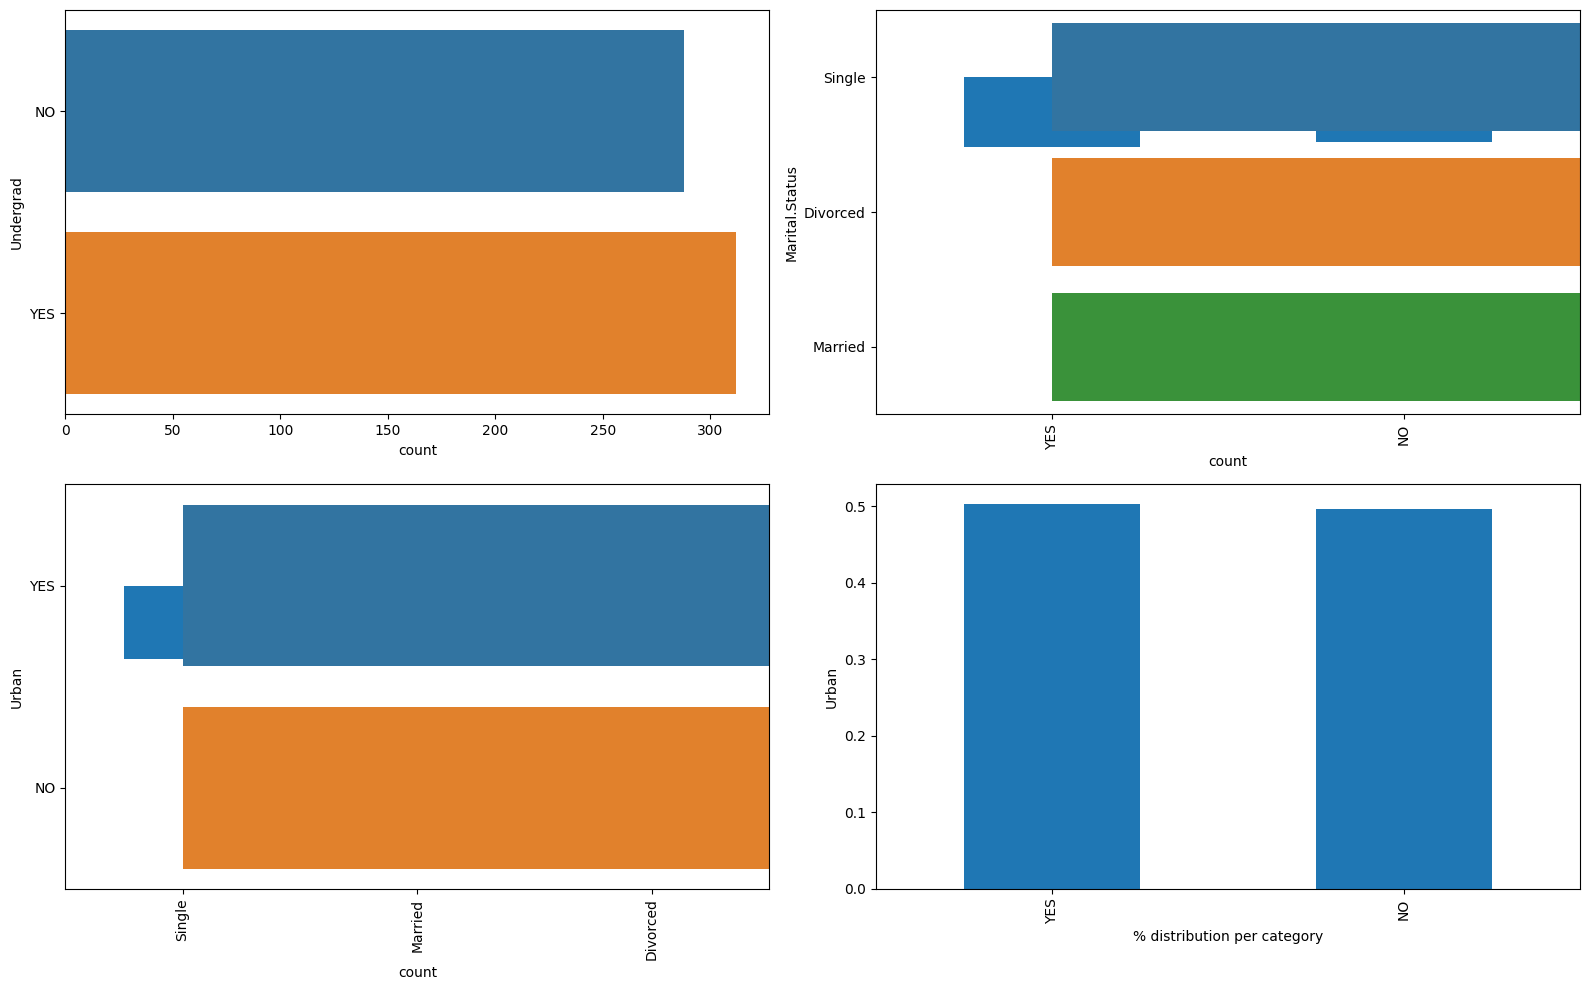

In [12]:
plt.figure(figsize=(16,10))
for i,col in enumerate(obj_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=df1,y=col)
    plt.subplot(2,2,i+1)
    df1[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()


In [13]:
num_columns = df1.select_dtypes(exclude='object').columns.tolist()


<ipython-input-14-580362cfca90>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col],color='g',shade=True)
<ipython-input-14-580362cfca90>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col],color='g',shade=True)
<ipython-input-14-580362cfca90>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col],color='g',shade=True)


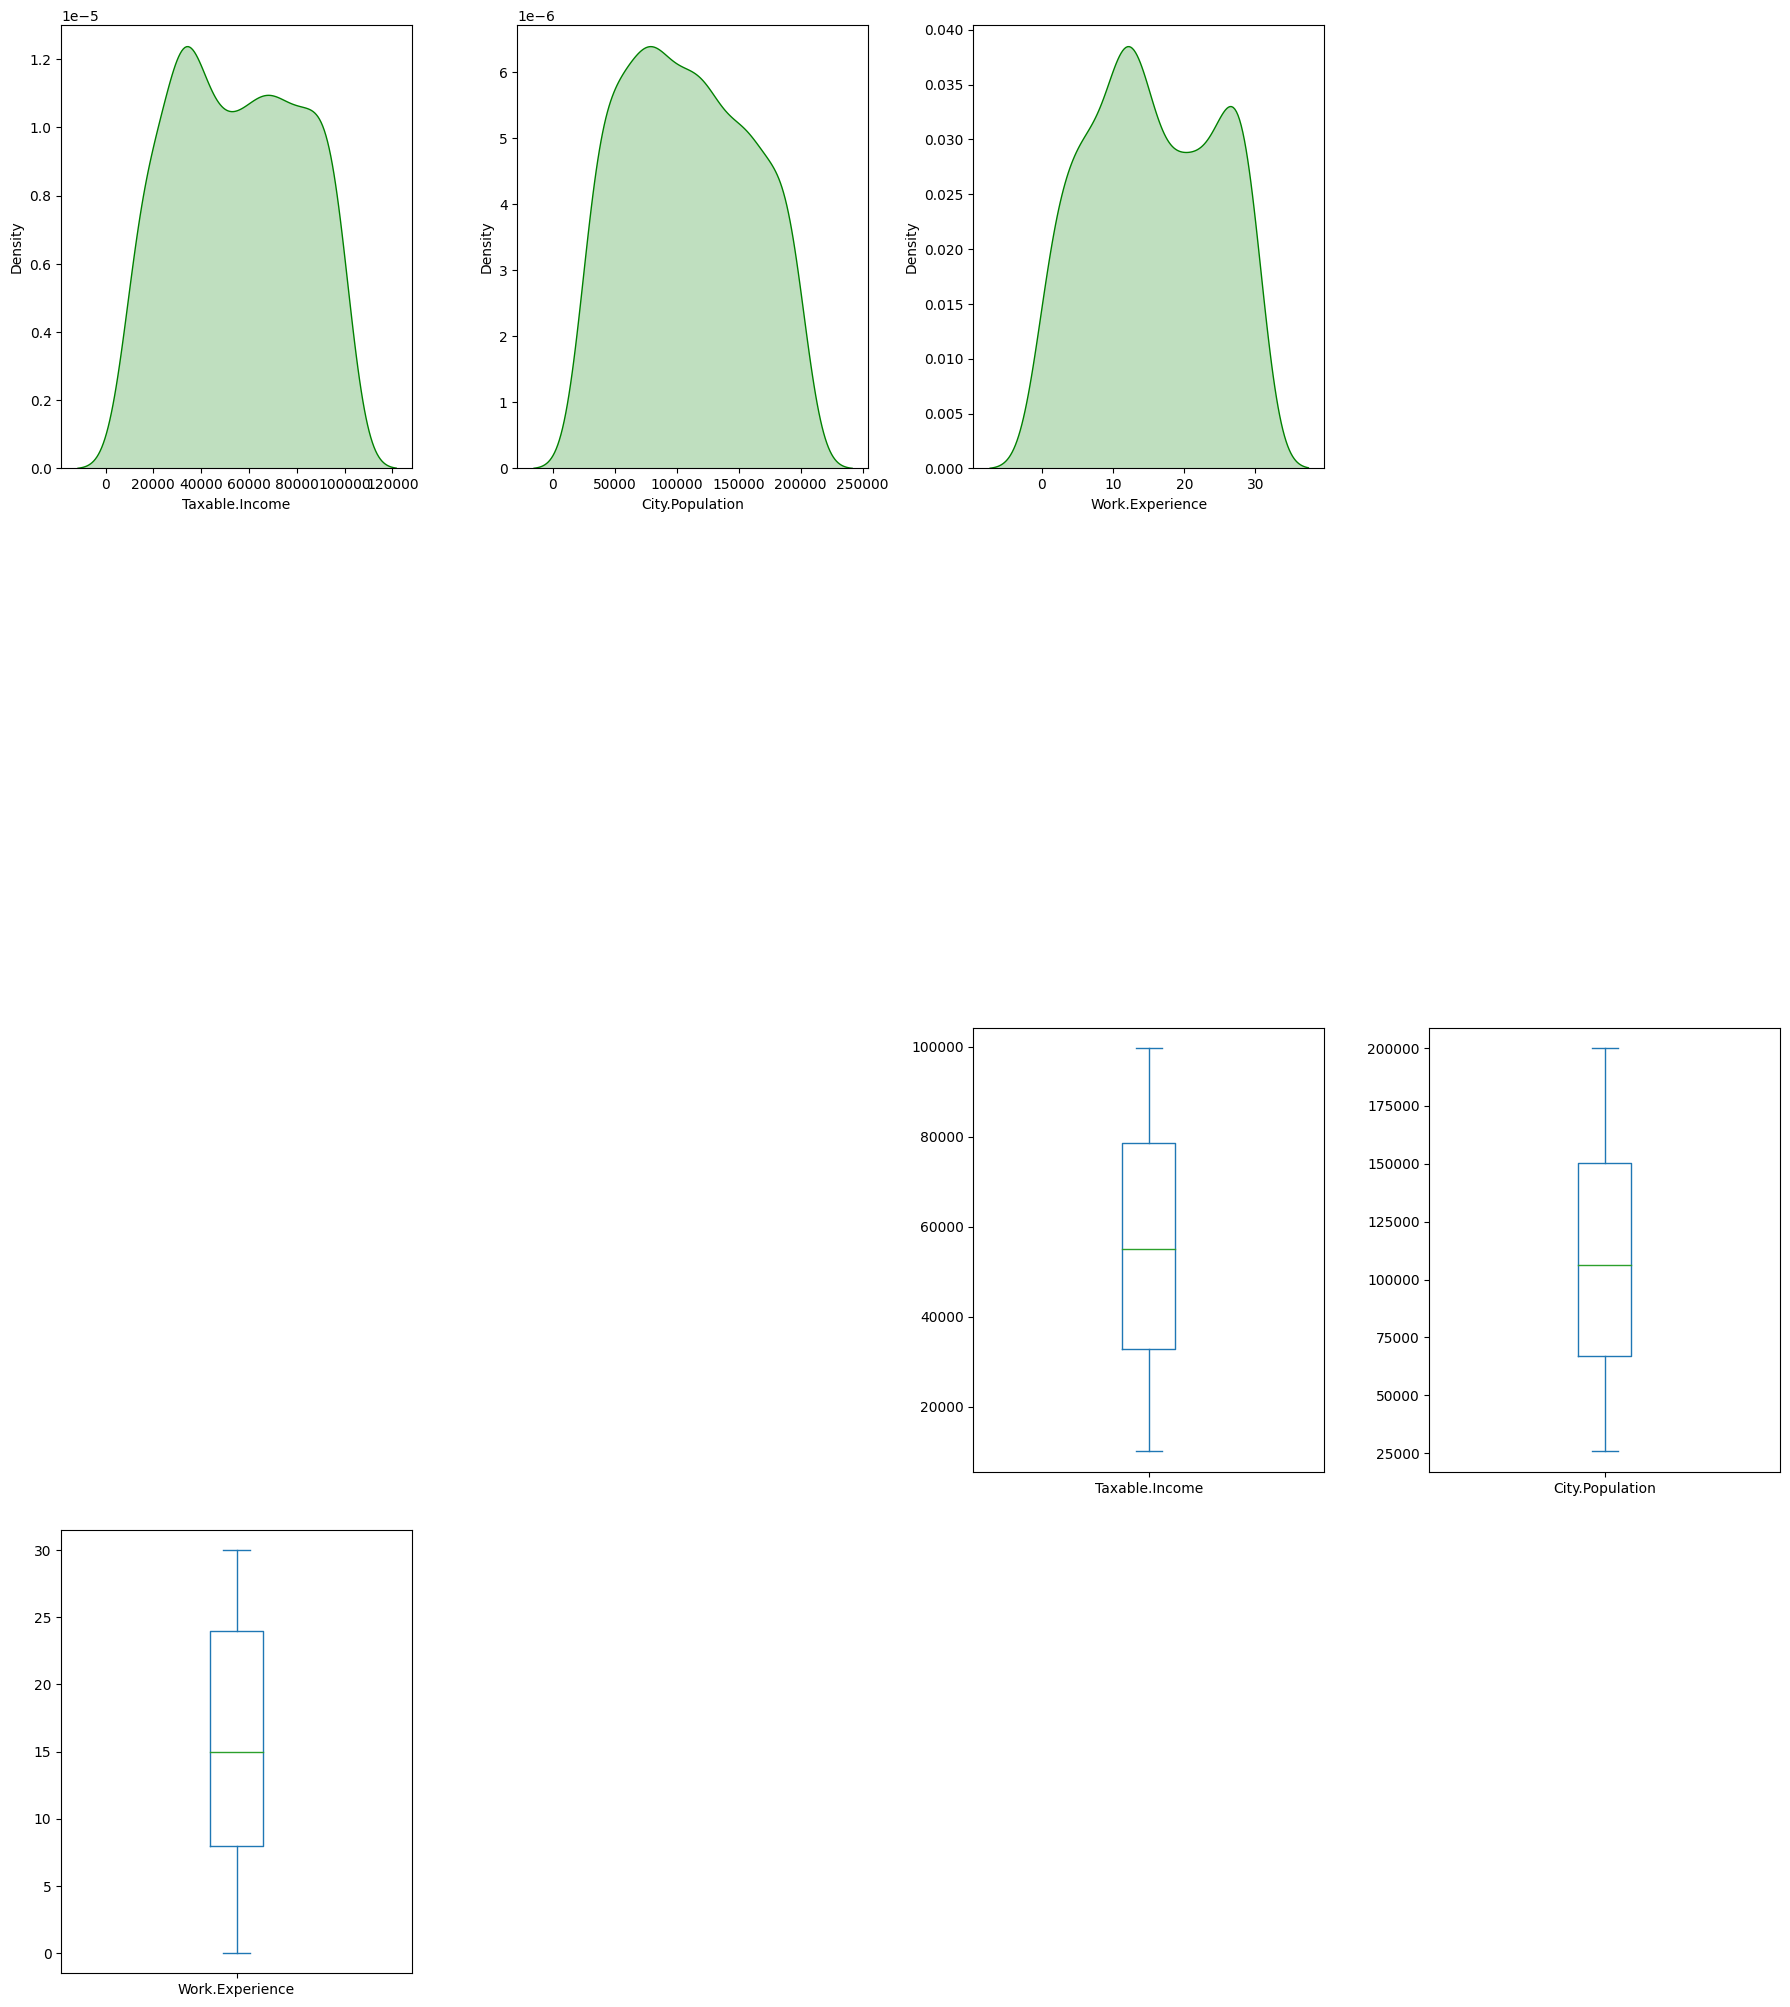

,Taxable.Income,City.Population,Work.Experience
skewness,0.030015,0.125009,0.018529
kurtosis,-1.199782,-1.120154,-1.167524


In [14]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout()
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [15]:
df1 = pd.get_dummies(df1, columns = ['Undergrad','Marital.Status','Urban'])


In [16]:
corr = df1.corr()


In [17]:
corr = df1.corr()


<Axes: >

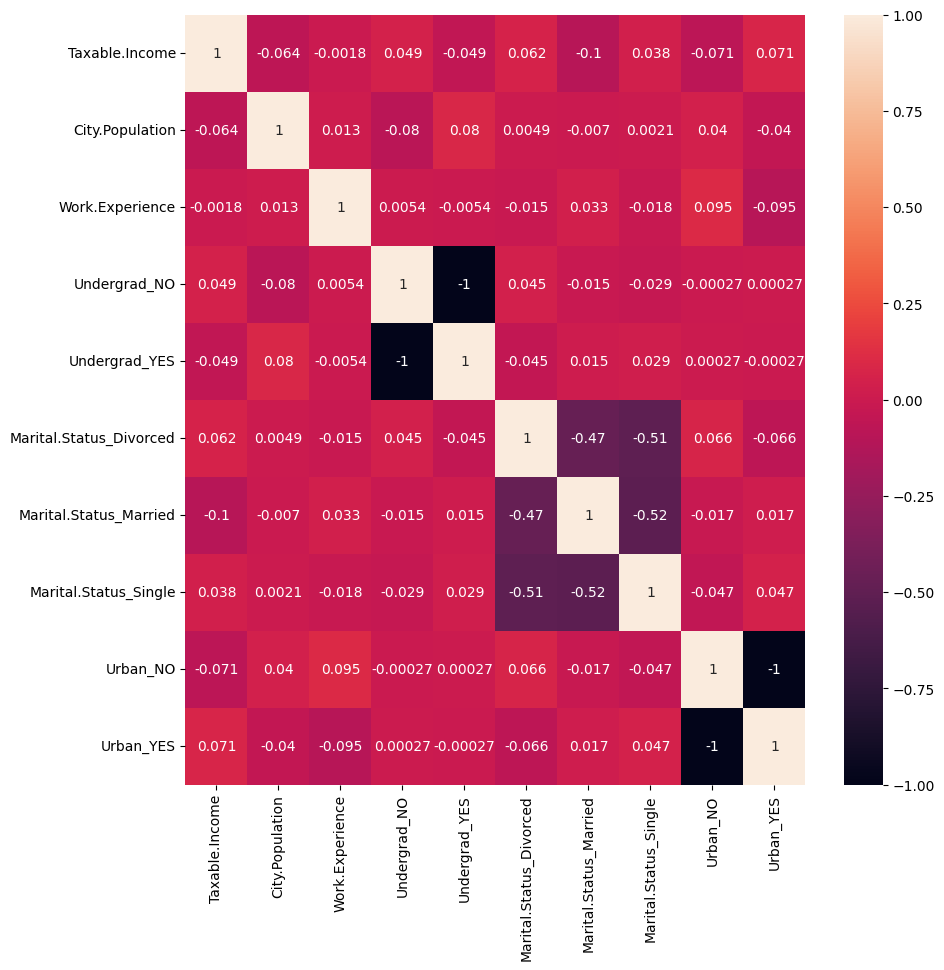

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

<b>3 - Random Forest Model</b> <br>
Since the target variable is continious, we create a class of taxable_income <= 30000 as "Risky" and others are "Good"

In [19]:
df1['Taxable.Income']=pd.cut(df1['Taxable.Income'],bins=[0,30000,100000],labels=['risky','good'])


In [20]:
list(df1.columns)


['Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Undergrad_NO',
 'Undergrad_YES',
 'Marital.Status_Divorced',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_NO',
 'Urban_YES']

In [21]:
X = df1.iloc[:,1:10]
y = df1.iloc[:,0]

In [22]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)


In [23]:
y_train.value_counts()


good     381
risky     99
Name: Taxable.Income, dtype: int64

In [24]:
model =RF(n_jobs=4,n_estimators = 150, oob_score =True,criterion ='entropy')
model.fit(x_train,y_train)
model.oob_score_

0.74375

In [25]:
pred_train = model.predict(x_train)


In [26]:
accuracy_score(y_train,pred_train)


1.0

In [27]:
confusion_matrix(y_train,pred_train)


array([[381,   0],
       [  0,  99]])

In [28]:
pred_test = model.predict(x_test)


In [29]:
accuracy_score(y_test,pred_test)


0.7166666666666667

In [30]:
confusion_matrix(y_test,pred_test)


array([[86,  9],
       [25,  0]])

In [31]:
df_t=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})


In [32]:
df_t


,Actual,Predicted
408,good,good
460,good,good
124,good,good
463,good,good
585,good,good
...,...,...
237,risky,good
299,good,good
388,good,good
423,good,good


In [33]:
cols = list(df1.columns)


In [34]:
predictors = cols[1:10]
target = cols[0]

In [35]:
tree1 = model.estimators_[20]


In [36]:
dot_data = StringIO()


In [37]:
dot_data = StringIO()


In [38]:
export_graphviz(tree1, out_file = dot_data, feature_names =predictors, class_names = target, filled =True,rounded=True,impurity =False,proportion=False,precision =2)


In [39]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


In [40]:
graph.write_png('fraud_full.png')


True

4 - Conclusion

Since the accuracy of the Training set is 100% we test the accurancy on the test data which is 72%

As seen in the confusion matrix of Test data 94 instances are presdected correctly and 26 instances are not

In [41]:
rf_small = RF(n_estimators=10, max_depth = 3)


In [42]:
rf_small.fit(x_train,y_train)


RandomForestClassifier(max_depth=3, n_estimators=10)

In [43]:
tree_small = rf_small.estimators_[5]


In [44]:
export_graphviz(tree_small, out_file = dot_data, feature_names = predictors, rounded = True, precision = 1)


In [45]:
graph_small = pydotplus.graph_from_dot_data(dot_data.getvalue())


In [46]:
graph.write_png('fraud_small.png')


True

In [47]:
img = mpimg.imread('/content/fraud_small.png')


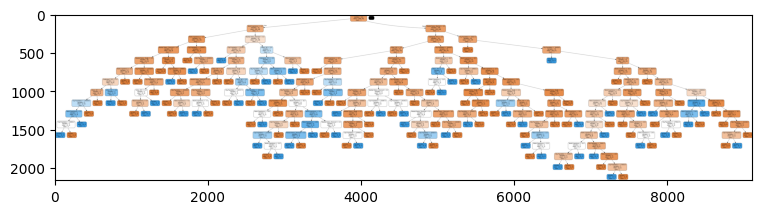

In [48]:
plt.imshow(img)


In [49]:
model.feature_importances_


array([0.52941487, 0.34282002, 0.01501689, 0.01933802, 0.01917645,
       0.01881581, 0.01780866, 0.01855274, 0.01905652])

In [50]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [51]:
fi

,feature,importance
0,City.Population,0.529415
1,Work.Experience,0.342820
3,Undergrad_YES,0.019338
4,Marital.Status_Divorced,0.019176
8,Urban_YES,0.019057
5,Marital.Status_Married,0.018816
7,Urban_NO,0.018553
6,Marital.Status_Single,0.017809
2,Undergrad_NO,0.015017


As seen in the above table city population is most important feature